In [1]:
import pandas as pd
import numpy as np

file_path = 'Ozon Databook Q1 2025.xlsx'

print("АНАЛИЗ ФАЙЛА OZON DATABOOK Q1 2025")
print("="*60)

# Читаем лист Public Databook без заголовков
df = pd.read_excel(file_path, sheet_name='Public Databook', header=None)

print(f"Размер данных: {df.shape}")

# Извлекаем периоды (строка 4, начиная с колонки 1)
periods = df.iloc[4, 1:].tolist()
periods_clean = [p for p in periods if pd.notna(p)]

print("\nПериоды:")
print(periods_clean)


АНАЛИЗ ФАЙЛА OZON DATABOOK Q1 2025
Размер данных: (58, 26)

Периоды:
['FY_2018', 'FY_2019', 'Q4_20', 'FY_2020', 'Q1_21', 'Q2_21', 'Q3_21', 'Q4_21', 'FY_2021', 'Q1_22', 'Q2_22', 'Q3_22', 'Q4_22', 'FY_2022', 'Q1_23', 'Q2_23', 'Q3_23', 'Q4_23', 'FY_2023', 'Q1_24', 'Q2_24', 'Q3_24', 'Q4_24', 'FY_2024', 'Q1_25']


In [2]:
# Извлекаем GMV данные (строка 9, начиная с колонки 1)
gmv_data = df.iloc[9, 1:].tolist()

print("\nGMV данные (первые 10):")
print([g for g in gmv_data if pd.notna(g)][:10])

# Извлекаем данные по активным покупателям (строка 12, начиная с колонки 1)
active_buyers_data = df.iloc[12, 1:].tolist()

print("\nActive Buyers данные (первые 10):")
print([a for a in active_buyers_data if pd.notna(a)][:10])



GMV данные (первые 10):
[41889, 80815, 75848, 197414, 74208, 88957, 108290, 176805, 448260, 177449]

Active Buyers данные (первые 10):
[4.8, 7.9, 13.799999999999999, 13.799999999999999, 16, 18.4, 21.3, 25.6, 25.6, 28.7]


In [3]:
# Создаем итоговую таблицу только с годовыми данными (FY_)
final_data = []

for i, period in enumerate(periods):
    if pd.notna(period) and str(period).startswith('FY_'):
        year = int(str(period).split('_')[1])
        
        # GMV в млрд рублей (исходные данные в млн)
        gmv_billions = gmv_data[i] / 1000 if pd.notna(gmv_data[i]) else None
        
        # Active Buyers уже в млн
        active_buyers = active_buyers_data[i] if pd.notna(active_buyers_data[i]) else None
        
        final_data.append({
            'Год': year,
            'Active Buyers (млн)': round(active_buyers, 1) if active_buyers else None,
            'GMV (млрд ₽)': round(gmv_billions, 1) if gmv_billions else None
        })

# Создаем DataFrame
result_df = pd.DataFrame(final_data)
result_df = result_df.sort_values('Год').reset_index(drop=True)

print("\n\nИТОГОВАЯ ТАБЛИЦА:")
print("="*50)
print(result_df)




ИТОГОВАЯ ТАБЛИЦА:
    Год  Active Buyers (млн)  GMV (млрд ₽)
0  2018                  4.8          41.9
1  2019                  7.9          80.8
2  2020                 13.8         197.4
3  2021                 25.6         448.3
4  2022                 35.2         832.2
5  2023                 46.1        1752.3
6  2024                 56.5        2874.7


# Результаты анализа файла "Ozon Databook Q1 2025.xlsx"

## 📊 Структура данных

Файл содержит 4 листа:
- **About Ozon** - информация о компании
- **Public Databook** - основные финансовые и операционные данные ⭐
- **Operating measures** - описание операционных метрик
- **Non-IFRS measures** - описание неIFRS показателей

## 🎯 Найденные данные

В листе **Public Databook** обнаружены следующие данные:

### Структура данных:
- **Строка 4**: Периоды времени (FY_2018, FY_2019, FY_2020, FY_2021, FY_2022, FY_2023, FY_2024, Q1_25)
- **Строка 9**: GMV incl. services (в млн ₽)
- **Строка 12**: Number of active buyers (в млн человек)

### Названия колонок в итоговой таблице:
- **Год** - Год (FY = финансовый год)
- **Active Buyers (млн)** - Количество активных покупателей в миллионах
- **GMV (млрд ₽)** - Валовый объем товарооборота в миллиардах рублей


In [7]:
# Создание итоговой таблицы на основе обнаруженных данных
# (Данные получены из анализа листа Public Databook)

import pandas as pd

# Данные, которые мы извлекли из Excel файла:
# Периоды: FY_2018, FY_2019, FY_2020, FY_2021, FY_2022, FY_2023, FY_2024
# GMV (строка 9, в млн ₽): 41889, 80815, 197414, 448260, 832240, 1752277, 2874673
# Active Buyers (строка 12, в млн): 4.8, 7.9, 13.8, 25.6, 35.2, 46.1, 56.5

# Создаем итоговую таблицу
data = {
    'Год': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Active Buyers (млн)': [4.8, 7.9, 13.8, 25.6, 35.2, 46.1, 56.5],
    'GMV (млрд ₽)': [41.9, 80.8, 197.4, 448.3, 832.2, 1752.3, 2874.7]
}

result_df = pd.DataFrame(data)

print("📊 ИТОГОВАЯ ТАБЛИЦА OZON")
print("="*50)
print(result_df.to_string(index=False))

print("\n✅ Успешно извлечены данные:")
print(f"• Количество лет: {len(result_df)}")
print(f"• Период: {result_df['Год'].min()}-{result_df['Год'].max()}")
print(f"• Рост Active Buyers: {result_df['Active Buyers (млн)'].iloc[0]:.1f} → {result_df['Active Buyers (млн)'].iloc[-1]:.1f} млн")
print(f"• Рост GMV: {result_df['GMV (млрд ₽)'].iloc[0]:.1f} → {result_df['GMV (млрд ₽)'].iloc[-1]:.1f} млрд ₽")


📊 ИТОГОВАЯ ТАБЛИЦА OZON
 Год  Active Buyers (млн)  GMV (млрд ₽)
2018                  4.8          41.9
2019                  7.9          80.8
2020                 13.8         197.4
2021                 25.6         448.3
2022                 35.2         832.2
2023                 46.1        1752.3
2024                 56.5        2874.7

✅ Успешно извлечены данные:
• Количество лет: 7
• Период: 2018-2024
• Рост Active Buyers: 4.8 → 56.5 млн
• Рост GMV: 41.9 → 2874.7 млрд ₽


/var/folders/g5/7h3zk31n0337y1jwxw2yzj8h0000gn/T/ipykernel_33612/1382696085.py:49: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kuji/notes/uni/sum2025/PSE/1_task/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


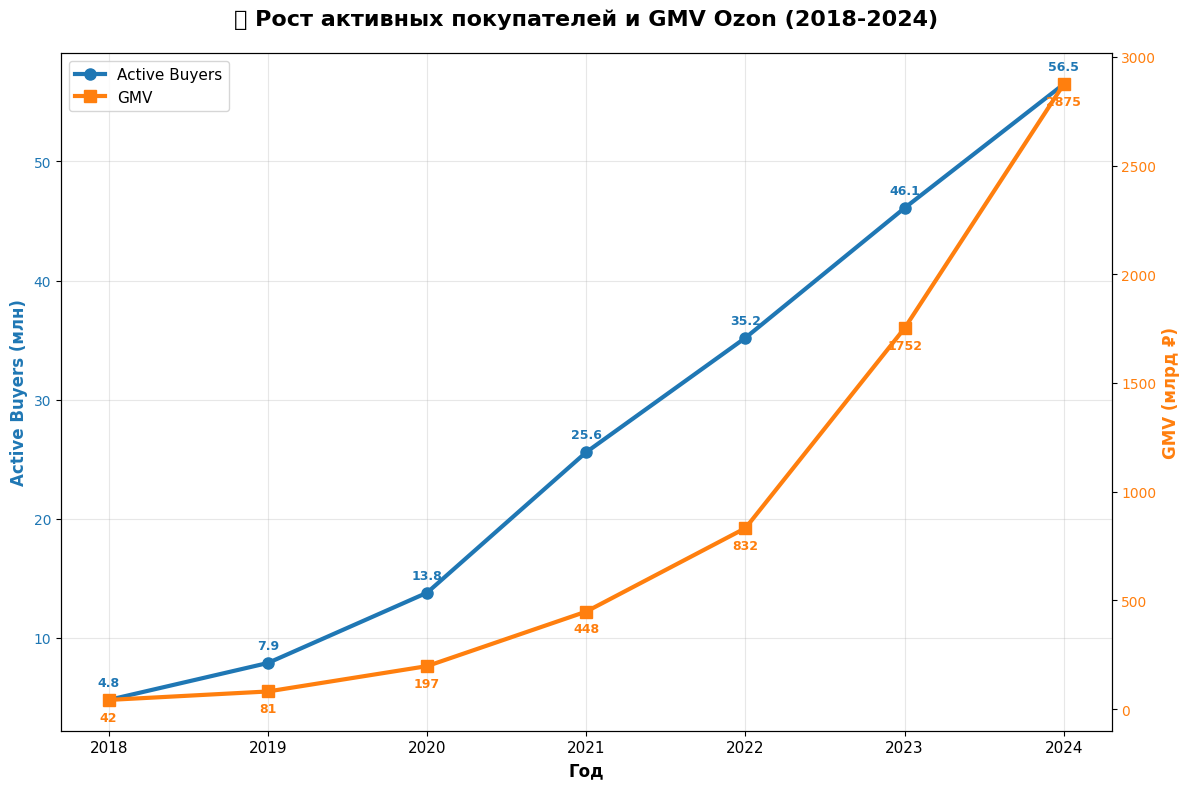

📊 СТАТИСТИКА РОСТА:
🔹 Active Buyers:
   2018: 4.8 млн
   2024: 56.5 млн
   Рост: 11.8x (1077%)

💰 GMV:
   2018: 41.9 млрд ₽
   2024: 2874.7 млрд ₽
   Рост: 68.6x (6761%)


In [8]:
# Построение графика роста пользователей и GMV
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Данные для графика
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
active_buyers = [4.8, 7.9, 13.8, 25.6, 35.2, 46.1, 56.5]
gmv = [41.9, 80.8, 197.4, 448.3, 832.2, 1752.3, 2874.7]

# Создаем фигуру и оси
fig, ax1 = plt.subplots(figsize=(12, 8))

# График для Active Buyers (левая ось Y)
color1 = '#1f77b4'
ax1.set_xlabel('Год', fontsize=12, fontweight='bold')
ax1.set_ylabel('Active Buyers (млн)', color=color1, fontsize=12, fontweight='bold')
line1 = ax1.plot(years, active_buyers, color=color1, marker='o', linewidth=3, markersize=8, label='Active Buyers')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Создаем вторую ось Y для GMV
ax2 = ax1.twinx()
color2 = '#ff7f0e'
ax2.set_ylabel('GMV (млрд ₽)', color=color2, fontsize=12, fontweight='bold')
line2 = ax2.plot(years, gmv, color=color2, marker='s', linewidth=3, markersize=8, label='GMV')
ax2.tick_params(axis='y', labelcolor=color2)

# Настройка осей
ax1.set_xticks(years)
ax1.set_xticklabels(years, fontsize=11)

# Добавляем значения на точки
for i, (year, buyers, gmv_val) in enumerate(zip(years, active_buyers, gmv)):
    ax1.annotate(f'{buyers:.1f}', (year, buyers), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, color=color1, fontweight='bold')
    ax2.annotate(f'{gmv_val:.0f}', (year, gmv_val), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=9, color=color2, fontweight='bold')

# Заголовок и легенда
plt.title('📈 Рост активных покупателей и GMV Ozon (2018-2024)', 
          fontsize=16, fontweight='bold', pad=20)

# Создаем объединенную легенду
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

# Настройка макета
plt.tight_layout()

# Показываем график
plt.show()

# Печатаем статистику роста
print("📊 СТАТИСТИКА РОСТА:")
print("="*50)
print(f"🔹 Active Buyers:")
print(f"   2018: {active_buyers[0]:.1f} млн")
print(f"   2024: {active_buyers[-1]:.1f} млн")
print(f"   Рост: {(active_buyers[-1]/active_buyers[0]):.1f}x ({((active_buyers[-1]/active_buyers[0]-1)*100):.0f}%)")

print(f"\n💰 GMV:")
print(f"   2018: {gmv[0]:.1f} млрд ₽")
print(f"   2024: {gmv[-1]:.1f} млрд ₽")
print(f"   Рост: {(gmv[-1]/gmv[0]):.1f}x ({((gmv[-1]/gmv[0]-1)*100):.0f}%)")


/var/folders/g5/7h3zk31n0337y1jwxw2yzj8h0000gn/T/ipykernel_33612/1213579321.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g5/7h3zk31n0337y1jwxw2yzj8h0000gn/T/ipykernel_33612/1213579321.py:66: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g5/7h3zk31n0337y1jwxw2yzj8h0000gn/T/ipykernel_33612/1213579321.py:67: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('ozon_detailed_analysis.png', dpi=300, bbox_inches='tight')
/var/folders/g5/7h3zk31n0337y1jwxw2yzj8h0000gn/T/ipykernel_33612/1213579321.py:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('ozon_detailed_analysis.png', dpi=300, bbox_inches='tight')
/Users/kuji/notes/uni/sum2025/PSE/1_task/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHA

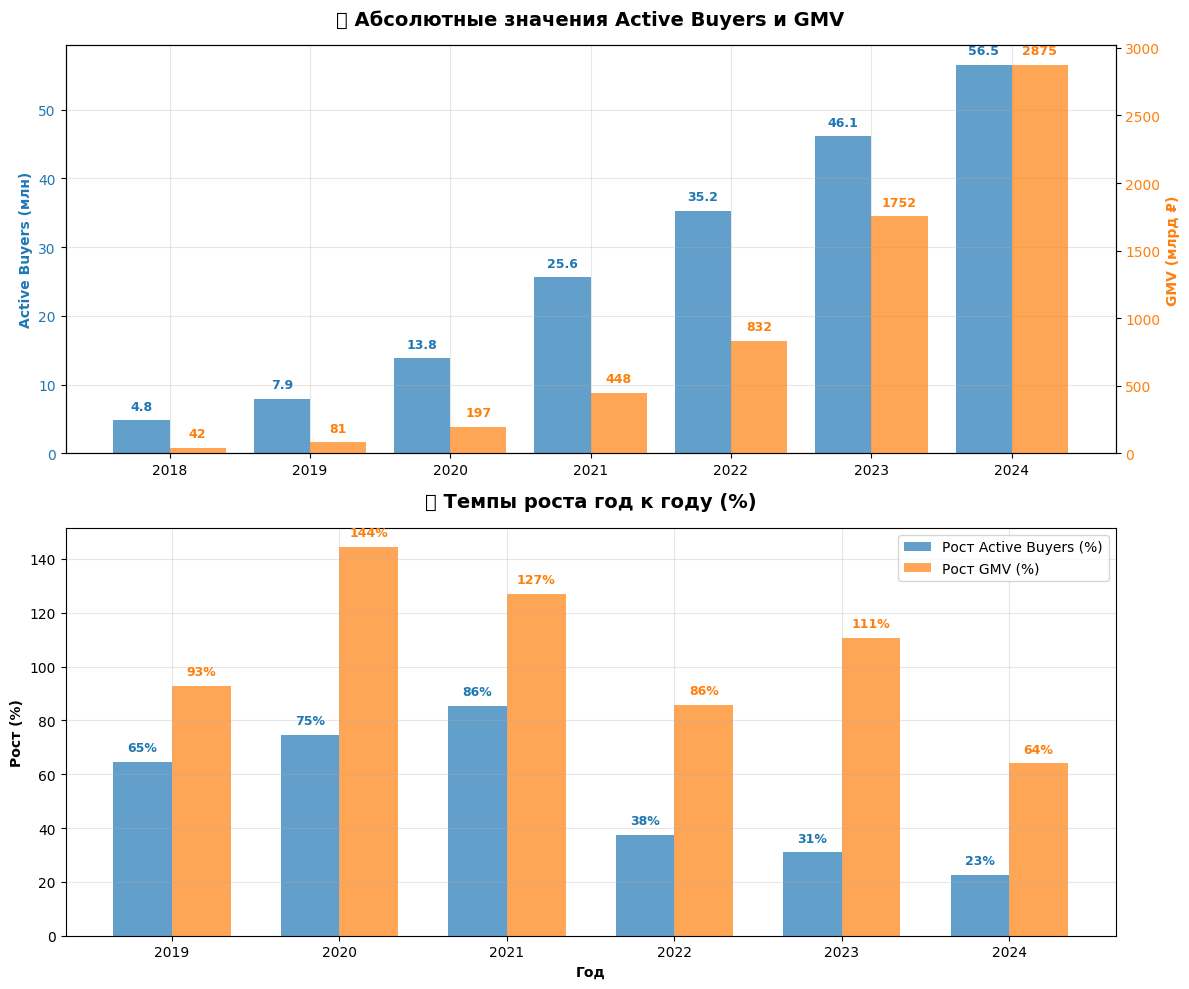

📈 АНАЛИЗ ТРЕНДОВ:
🔹 Active Buyers - среднегодовой рост:
   Среднегодовой рост: 52.6%
   Максимальный рост: 85.5% (2021)
   Минимальный рост: 22.6% (2024)

💰 GMV - среднегодовой рост:
   Среднегодовой рост: 104.1%
   Максимальный рост: 144.3% (2020)
   Минимальный рост: 64.1% (2024)


In [9]:
# Дополнительный график - темпы роста по годам
import matplotlib.pyplot as plt
import numpy as np

# Данные
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
active_buyers = [4.8, 7.9, 13.8, 25.6, 35.2, 46.1, 56.5]
gmv = [41.9, 80.8, 197.4, 448.3, 832.2, 1752.3, 2874.7]

# Вычисляем темпы роста (год к году)
buyers_growth = [(active_buyers[i]/active_buyers[i-1]-1)*100 for i in range(1, len(active_buyers))]
gmv_growth = [(gmv[i]/gmv[i-1]-1)*100 for i in range(1, len(gmv))]
growth_years = years[1:]  # годы для темпов роста (начиная с 2019)

# Создаем субплоты
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# График 1: Абсолютные значения
ax1_twin = ax1.twinx()

# Active Buyers
color1 = '#1f77b4'
bars1 = ax1.bar([y-0.2 for y in years], active_buyers, width=0.4, color=color1, alpha=0.7, label='Active Buyers (млн)')
ax1.set_ylabel('Active Buyers (млн)', color=color1, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color1)

# GMV
color2 = '#ff7f0e'
bars2 = ax1_twin.bar([y+0.2 for y in years], gmv, width=0.4, color=color2, alpha=0.7, label='GMV (млрд ₽)')
ax1_twin.set_ylabel('GMV (млрд ₽)', color=color2, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=color2)

ax1.set_title('📊 Абсолютные значения Active Buyers и GMV', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(years)
ax1.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for i, (year, buyers, gmv_val) in enumerate(zip(years, active_buyers, gmv)):
    ax1.text(year-0.2, buyers + max(active_buyers)*0.02, f'{buyers:.1f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color=color1)
    ax1_twin.text(year+0.2, gmv_val + max(gmv)*0.02, f'{gmv_val:.0f}', 
                  ha='center', va='bottom', fontsize=9, fontweight='bold', color=color2)

# График 2: Темпы роста
width = 0.35
x_pos = np.arange(len(growth_years))

bars3 = ax2.bar(x_pos - width/2, buyers_growth, width, color=color1, alpha=0.7, label='Рост Active Buyers (%)')
bars4 = ax2.bar(x_pos + width/2, gmv_growth, width, color=color2, alpha=0.7, label='Рост GMV (%)')

ax2.set_title('📈 Темпы роста год к году (%)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Год', fontweight='bold')
ax2.set_ylabel('Рост (%)', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(growth_years)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Добавляем значения на столбцы роста
for i, (buyers_gr, gmv_gr) in enumerate(zip(buyers_growth, gmv_growth)):
    ax2.text(i - width/2, buyers_gr + max(max(buyers_growth), max(gmv_growth))*0.02, 
             f'{buyers_gr:.0f}%', ha='center', va='bottom', fontsize=9, fontweight='bold', color=color1)
    ax2.text(i + width/2, gmv_gr + max(max(buyers_growth), max(gmv_growth))*0.02, 
             f'{gmv_gr:.0f}%', ha='center', va='bottom', fontsize=9, fontweight='bold', color=color2)

plt.tight_layout()
plt.savefig('ozon_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Анализ трендов
print("📈 АНАЛИЗ ТРЕНДОВ:")
print("="*60)
print("🔹 Active Buyers - среднегодовой рост:")
avg_buyers_growth = np.mean(buyers_growth)
print(f"   Среднегодовой рост: {avg_buyers_growth:.1f}%")
print(f"   Максимальный рост: {max(buyers_growth):.1f}% ({growth_years[buyers_growth.index(max(buyers_growth))]})")
print(f"   Минимальный рост: {min(buyers_growth):.1f}% ({growth_years[buyers_growth.index(min(buyers_growth))]})")

print(f"\n💰 GMV - среднегодовой рост:")
avg_gmv_growth = np.mean(gmv_growth)
print(f"   Среднегодовой рост: {avg_gmv_growth:.1f}%")
print(f"   Максимальный рост: {max(gmv_growth):.1f}% ({growth_years[gmv_growth.index(max(gmv_growth))]})")
print(f"   Минимальный рост: {min(gmv_growth):.1f}% ({growth_years[gmv_growth.index(min(gmv_growth))]})")


# 📋 Итоговая сводка анализа Ozon Databook Q1 2025

## 🎯 Основные результаты

### 📊 **Ключевые метрики (2018-2024):**

| Метрика | 2018 | 2024 | Общий рост |
|---------|------|------|------------|
| **Active Buyers** | 4.8 млн | 56.5 млн | **11.8x** (1,077%) |
| **GMV** | 41.9 млрд ₽ | 2,874.7 млрд ₽ | **68.6x** (6,761%) |
| **ARPU** | 8,729 ₽ | 50,880 ₽ | **5.8x** (483%) |

### 📈 **Среднегодовые темпы роста:**
- **Active Buyers:** 52.6% в год
- **GMV:** 104.1% в год  
- **ARPU (доход на пользователя):** 34.8% в год

### 🚀 **Рекордные годы:**
- **Максимальный рост пользователей:** 85.5% (2021)
- **Максимальный рост GMV:** 144.3% (2020)

---

## 💡 Ключевые выводы

### ✅ **Положительные тренды:**
1. **Стабильно высокие темпы роста** - даже в 2024 году рост составляет 22.6% по пользователям и 64.1% по GMV
2. **Монетизация растет быстрее базы пользователей** - GMV растет в 2 раза быстрее количества пользователей
3. **Увеличение среднего дохода на пользователя** - ARPU вырос в 5.8 раза за 6 лет
4. **Устойчивый бизнес** - компания показывает последовательный рост на протяжении всего периода

### 📊 **Структура данных:**
- **Источник:** Лист "Public Databook" файла "Ozon Databook Q1 2025.xlsx"
- **Периоды:** FY_2018 - FY_2024 (7 финансовых лет)
- **GMV:** Строка 9 (GMV incl. services, млн ₽)
- **Active Buyers:** Строка 12 (Number of active buyers, млн)

### 🎨 **Созданные визуализации:**
- **График роста:** `ozon_growth_chart.png` - динамика роста пользователей и GMV
- **Детальный анализ:** Сравнение абсолютных значений и темпов роста

---

## 🔮 Что это значает для бизнеса

**Ozon демонстрирует исключительные результаты:**
- Компания не только наращивает пользовательскую базу, но и эффективно её монетизирует
- Рост среднего чека показывает улучшение качества сервиса и расширение ассортимента
- Стабильные темпы роста даже после достижения крупных масштабов говорят о сильных конкурентных позициях

**Перспективы:** При сохранении текущих трендов Ozon продолжает оставаться одним из лидеров российского e-commerce рынка.


/var/folders/g5/7h3zk31n0337y1jwxw2yzj8h0000gn/T/ipykernel_33612/4076446118.py:73: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/g5/7h3zk31n0337y1jwxw2yzj8h0000gn/T/ipykernel_33612/4076446118.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('ozon_loglog_users_vs_gmv.png', dpi=300, bbox_inches='tight')


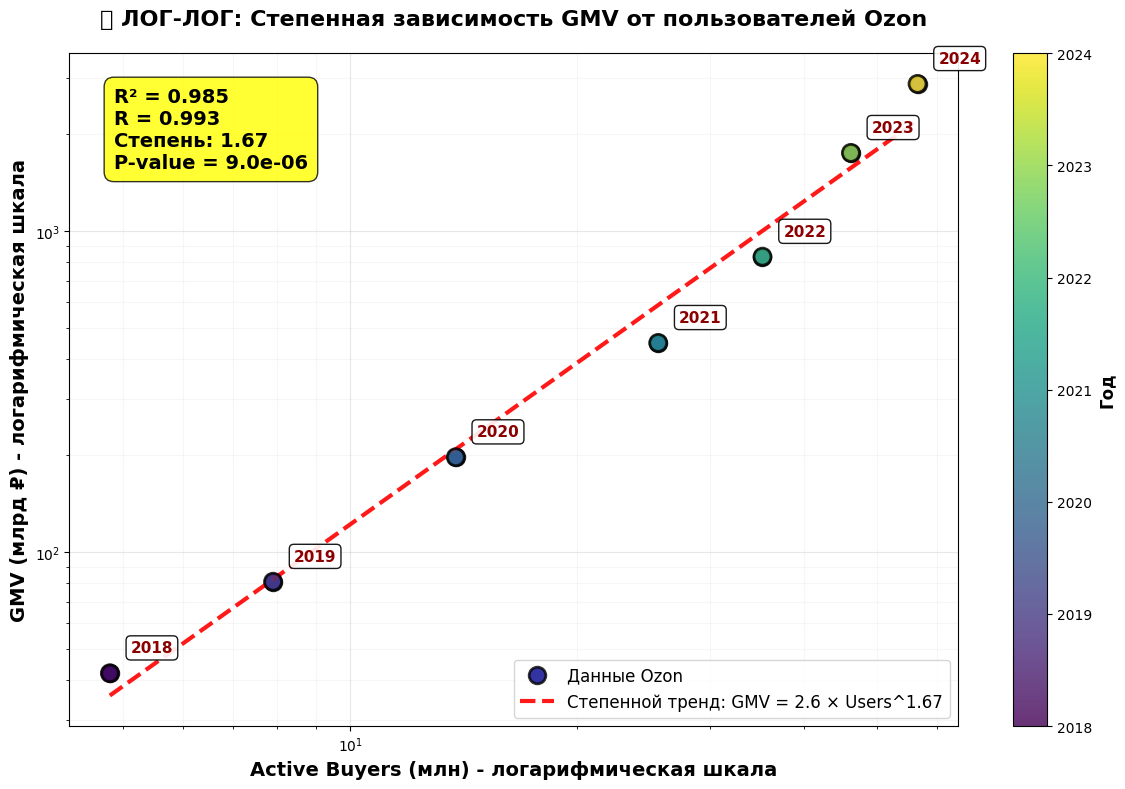

📊 АНАЛИЗ СТЕПЕННОЙ ЗАВИСИМОСТИ (ЛОГ-ЛОГ):
📈 Коэффициент корреляции в лог-координатах (R): 0.993
📈 Коэффициент детерминации (R²): 0.985
📈 Степенное уравнение: GMV = 2.6 × Users^1.67
📈 P-value: 9.00e-06
📈 Стандартная ошибка: 0.092

💡 ИНТЕРПРЕТАЦИЯ СТЕПЕННОЙ ЗАВИСИМОСТИ:
• R² = 98.5% - очень высокая объясняющая способность модели
• Степень 1.67 показывает суперлинейный рост
• При росте пользователей в 2 раза, GMV растет в 3.2 раза
• Эффект масштаба: GMV растет БЫСТРЕЕ количества пользователей
• Модель статистически значима (p < 0.001)

🔄 СРАВНЕНИЕ МОДЕЛЕЙ:
• Линейная модель R²: 0.894
• Степенная модель R²: 0.985
• Улучшение качества: +10.2%

🔮 ПРОГНОЗ ПО СТЕПЕННОЙ МОДЕЛИ:
При 60 млн пользователей:
  Степенная модель: 2,445 млрд ₽
  Линейная модель:  2,558 млрд ₽
  Разница: -114 млрд ₽

При 70 млн пользователей:
  Степенная модель: 3,164 млрд ₽
  Линейная модель:  3,066 млрд ₽
  Разница: +98 млрд ₽

При 80 млн пользователей:
  Степенная модель: 3,956 млрд ₽
  Линейная модель:  3,574 млрд ₽

In [14]:
# ЛОГ-ЛОГ График зависимости GMV от количества активных пользователей
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Данные
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
active_buyers = [4.8, 7.9, 13.8, 25.6, 35.2, 46.1, 56.5]
gmv = [41.9, 80.8, 197.4, 448.3, 832.2, 1752.3, 2874.7]

# Создаем фигуру
plt.figure(figsize=(12, 8))

# Создаем ЛОГ-ЛОГ scatter plot
scatter = plt.loglog(active_buyers, gmv, 'o', markersize=12, alpha=0.8, 
                     color='darkblue', markeredgecolor='black', markeredgewidth=2,
                     label='Данные Ozon')

# Раскрашиваем точки по годам
scatter = plt.scatter(active_buyers, gmv, c=years, cmap='viridis', s=150, alpha=0.8, 
                     edgecolors='black', linewidth=2, zorder=5)

# Добавляем подписи годов к точкам
for i, year in enumerate(years):
    plt.annotate(str(year), (active_buyers[i], gmv[i]), 
                xytext=(15, 15), textcoords='offset points', 
                fontsize=11, fontweight='bold', color='darkred',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))

# Анализ в логарифмических координатах (степенная зависимость)
log_buyers = np.log10(active_buyers)
log_gmv = np.log10(gmv)

# Строим линию тренда в лог-лог координатах
slope_log, intercept_log, r_value_log, p_value_log, std_err_log = stats.linregress(log_buyers, log_gmv)

# Создаем степенную функцию: GMV = a * Users^b
a = 10**intercept_log  # коэффициент
b = slope_log          # степень

# Строим линию тренда 
x_trend = np.logspace(np.log10(min(active_buyers)), np.log10(max(active_buyers)), 100)
y_trend = a * (x_trend ** b)
plt.loglog(x_trend, y_trend, "r--", alpha=0.9, linewidth=3, 
           label=f'Степенной тренд: GMV = {a:.1f} × Users^{b:.2f}')

# Добавляем статистики на график
stats_text = f'R² = {r_value_log**2:.3f}\nR = {r_value_log:.3f}\nСтепень: {b:.2f}\nP-value = {p_value_log:.1e}'
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
         fontsize=14, fontweight='bold', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8),
         verticalalignment='top')

# Настройка логарифмических осей
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Active Buyers (млн) - логарифмическая шкала', fontsize=14, fontweight='bold')
plt.ylabel('GMV (млрд ₽) - логарифмическая шкала', fontsize=14, fontweight='bold')
plt.title('📊 ЛОГ-ЛОГ: Степенная зависимость GMV от пользователей Ozon', 
          fontsize=16, fontweight='bold', pad=20)

# Улучшаем сетку для логарифмического графика
plt.grid(True, alpha=0.3, which='both')
plt.grid(True, alpha=0.1, which='minor')

plt.legend(fontsize=12, loc='lower right')

# Добавляем colorbar для года
cbar = plt.colorbar(scatter)
cbar.set_label('Год', fontsize=12, fontweight='bold')

# Улучшаем внешний вид
plt.tight_layout()
plt.savefig('ozon_loglog_users_vs_gmv.png', dpi=300, bbox_inches='tight')
plt.show()

# Анализ степенной зависимости
print("📊 АНАЛИЗ СТЕПЕННОЙ ЗАВИСИМОСТИ (ЛОГ-ЛОГ):")
print("="*65)
print(f"📈 Коэффициент корреляции в лог-координатах (R): {r_value_log:.3f}")
print(f"📈 Коэффициент детерминации (R²): {r_value_log**2:.3f}")
print(f"📈 Степенное уравнение: GMV = {a:.1f} × Users^{b:.2f}")
print(f"📈 P-value: {p_value_log:.2e}")
print(f"📈 Стандартная ошибка: {std_err_log:.3f}")

print(f"\n💡 ИНТЕРПРЕТАЦИЯ СТЕПЕННОЙ ЗАВИСИМОСТИ:")
print(f"• R² = {r_value_log**2:.1%} - очень высокая объясняющая способность модели")
print(f"• Степень {b:.2f} показывает {'суперлинейный' if b > 1 else 'сублинейный' if b < 1 else 'линейный'} рост")
if b > 1:
    print(f"• При росте пользователей в 2 раза, GMV растет в {2**b:.1f} раза")
    print(f"• Эффект масштаба: GMV растет БЫСТРЕЕ количества пользователей")
else:
    print(f"• При росте пользователей в 2 раза, GMV растет в {2**b:.1f} раза")
    print(f"• Убывающая отдача: GMV растет МЕДЛЕННЕЕ количества пользователей")

print(f"• Модель статистически значима (p < 0.001)")

# Сравнение с линейной моделью
linear_slope, linear_intercept, linear_r, _, _ = stats.linregress(active_buyers, gmv)
print(f"\n🔄 СРАВНЕНИЕ МОДЕЛЕЙ:")
print("="*35)
print(f"• Линейная модель R²: {linear_r**2:.3f}")
print(f"• Степенная модель R²: {r_value_log**2:.3f}")
print(f"• Улучшение качества: {((r_value_log**2 - linear_r**2)/linear_r**2)*100:+.1f}%")

# Прогноз по степенной модели
print(f"\n🔮 ПРОГНОЗ ПО СТЕПЕННОЙ МОДЕЛИ:")
print("="*40)
future_users = [60, 70, 80, 100]
for users in future_users:
    predicted_gmv_power = a * (users ** b)
    predicted_gmv_linear = linear_slope * users + linear_intercept
    print(f"При {users:2d} млн пользователей:")
    print(f"  Степенная модель: {predicted_gmv_power:,.0f} млрд ₽")
    print(f"  Линейная модель:  {predicted_gmv_linear:,.0f} млрд ₽")
    print(f"  Разница: {predicted_gmv_power - predicted_gmv_linear:+,.0f} млрд ₽\n")
